In [1]:
import nltk

# Download necessary NLTK data
# Make sure to run this cell once to download all required resources
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

try:
    nltk.data.find('tokenizers/punkt') # 'punkt' is usually sufficient, but 'punkt_tab' is explicitly requested
except LookupError:
    nltk.download('punkt')

try:
    # This is the new one you need to add for the current error!
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

# For lemmatization, you might also need the 'omw-1.4' resource for WordNet's open multilingual wordnet
try:
    nltk.data.find('corpora/omw-1.4')
except LookupError:
    nltk.download('omw-1.4')

print("All necessary NLTK data downloaded.")

All necessary NLTK data downloaded.


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
import os
import sys

current_dir = os.getcwd()
print(f"Current working directory: {current_dir}") # DEBUG

project_root = os.path.abspath(os.path.join(current_dir, '..'))
print(f"Calculated project root: {project_root}") # DEBUG

if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"Added project root to sys.path: {project_root}") # DEBUG

data_dir = os.path.join(project_root, 'data')
print(f"Calculated data directory: {data_dir}") # DEBUG

if not os.path.exists(data_dir):
    try:
        os.makedirs(data_dir)
        print(f"Successfully created directory: {data_dir}") # DEBUG
    except OSError as e:
        print(f"ERROR: Failed to create directory {data_dir}. Reason: {e}") # DEBUG
else:
    print(f"Directory already exists: {data_dir}") # DEBUG
    
# --- TEST FILE SAVE ---
test_file_path = os.path.join(data_dir, 'test_write.txt')
try:
    with open(test_file_path, 'w') as f:
        f.write("This is a test file.\n")
    print(f"Successfully wrote test file to: {test_file_path}")
    # Verify by listing contents (optional, but good for visual confirmation)
    print(f"Files in data directory: {os.listdir(data_dir)}")
except Exception as e:
    print(f"ERROR: Failed to write test file to {test_file_path}. Reason: {e}")
# --- END TEST FILE SAVE ---


Current working directory: c:\Users\asus\OneDrive\Desktop\projects\sentiment_analysis_project\notebook
Calculated project root: c:\Users\asus\OneDrive\Desktop\projects\sentiment_analysis_project
Added project root to sys.path: c:\Users\asus\OneDrive\Desktop\projects\sentiment_analysis_project
Calculated data directory: c:\Users\asus\OneDrive\Desktop\projects\sentiment_analysis_project\data
Directory already exists: c:\Users\asus\OneDrive\Desktop\projects\sentiment_analysis_project\data
Successfully wrote test file to: c:\Users\asus\OneDrive\Desktop\projects\sentiment_analysis_project\data\test_write.txt
Files in data directory: ['test_write.txt', 'tweet_eval_sentiment_multiclass_preprocessed.csv', 'tweet_eval_sentiment_preprocessed.csv', 'twitter_sentiment_preprocessed.csv']


In [3]:
import pandas as pd
from src.data_loader import load_twitter_sentiment_dataset_multiclass
from src.preprocessor import TextPreprocessor
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

In [4]:
df = load_twitter_sentiment_dataset_multiclass()

In [5]:
print("original data head:")
print(df.head())
print("\n Sentiment Distribution:")
print(df['sentiment'].value_counts())

original data head:
                                                text  sentiment
0  "QT @user In the original draft of the 7th boo...          2
1  "Ben Smith / Smith (concussion) remains out of...          1
2  Sorry bout the stream last night I crashed out...          1
3  Chase Headley's RBI double in the 8th inning o...          1
4  @user Alciato: Bee will invest 150 million in ...          2

 Sentiment Distribution:
sentiment
1    27479
2    21043
0    11377
Name: count, dtype: int64


In [6]:
preprocessor = TextPreprocessor()

In [7]:
# Apply preprocessing
df['processed_text'] = df['text'].apply(preprocessor.preprocess)
print("\nProcessed Data Head:")
print(df.head())


Processed Data Head:
                                                text  sentiment  \
0  "QT @user In the original draft of the 7th boo...          2   
1  "Ben Smith / Smith (concussion) remains out of...          1   
2  Sorry bout the stream last night I crashed out...          1   
3  Chase Headley's RBI double in the 8th inning o...          1   
4  @user Alciato: Bee will invest 150 million in ...          2   

                                      processed_text  
0  qt original draft th book remus lupin survived...  
1  ben smith smith concussion remains lineup thur...  
2  sorry bout stream last night crashed tonight s...  
3  chase headleys rbi double th inning david pric...  
4  alciato bee invest million january another sum...  


In [8]:
#saving preprocesses data
# In notebooks/01_data_exploration_and_cleaning.ipynb
# ...
# After data_dir is calculated

file_path_to_save = os.path.join(data_dir, 'tweet_eval_sentiment_multiclass_preprocessed.csv') 

df.to_csv(file_path_to_save, index=False)
print(f"DataFrame saved to: {file_path_to_save}")

DataFrame saved to: c:\Users\asus\OneDrive\Desktop\projects\sentiment_analysis_project\data\tweet_eval_sentiment_multiclass_preprocessed.csv


In [9]:
#visualization : word frequencues and n grams
all_words = "".join(df['processed_text']).split()

In [10]:
#word frequencies
word_counts= Counter(all_words)
most_common_words = word_counts.most_common(20)
print("\n most common words:")
print(most_common_words)


 most common words:
[('may', 5863), ('tomorrow', 5314), ('th', 5102), ('day', 3786), ('going', 2816), ('st', 2768), ('like', 2754), ('see', 2738), ('night', 2701), ('get', 2698), ('time', 2379), ('u', 2244), ('friday', 2233), ('im', 2161), ('go', 2122), ('sunday', 2015), ('one', 1950), ('new', 1910), ('nd', 1859), ('amp', 1838)]


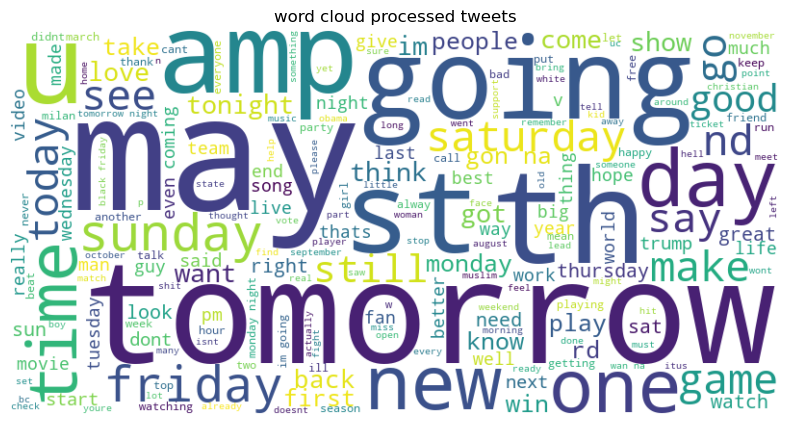

In [11]:
#wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("word cloud processed tweets")
plt.show()

In [12]:
def get_ngrams(text, n):
    tokens = text.split()
    ngrams = []
    for i in range(len(tokens) - n + 1):
        ngrams.append(tuple(tokens[i:i+n]))
    return ngrams

all_bigrams = []
for text in df['processed_text']:
    all_bigrams.extend(get_ngrams(text, 2))

bigram_counts = Counter(all_bigrams)
most_common_bigrams = bigram_counts.most_common(20)
print("\nMost Common Bigrams:")
print(most_common_bigrams)



Most Common Bigrams:
[(('gon', 'na'), 879), (('im', 'going'), 552), (('tomorrow', 'night'), 481), (('cant', 'wait'), 430), (('monday', 'night'), 426), (('wan', 'na'), 375), (('black', 'friday'), 363), (('friday', 'night'), 344), (('look', 'like'), 322), (('last', 'night'), 305), (('john', 'cena'), 305), (('big', 'brother'), 304), (('saturday', 'night'), 299), (('frank', 'ocean'), 293), (('ice', 'cube'), 292), (('kanye', 'west'), 288), (('foo', 'fighter'), 287), (('red', 'sox'), 280), (('sam', 'smith'), 278), (('donald', 'trump'), 277)]


C:\Users\asus\AppData\Local\Temp\ipykernel_17048\609768235.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Bigram_str', data=bigram_df, palette='viridis')


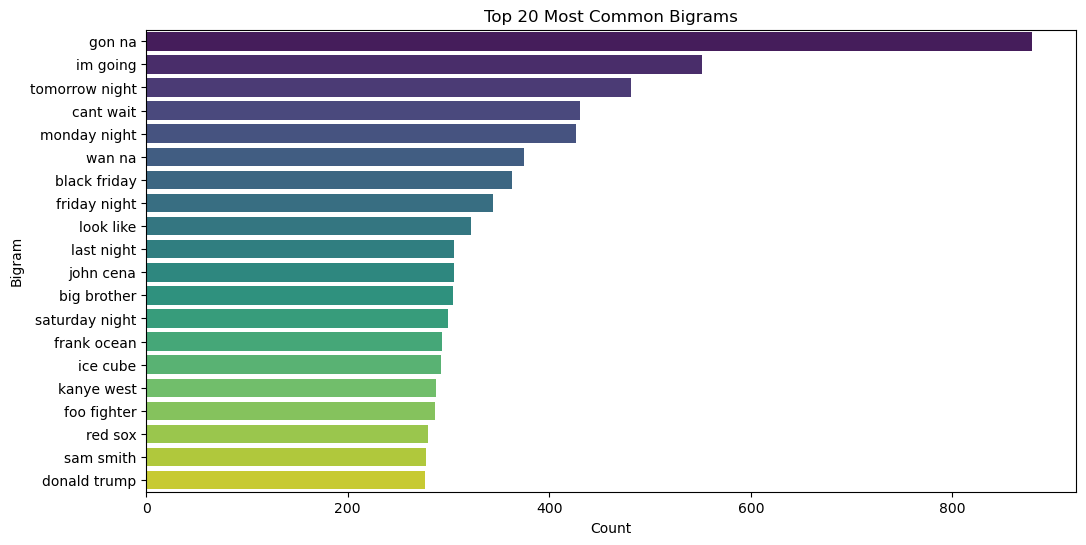

In [13]:
bigram_df = pd.DataFrame(most_common_bigrams, columns=['Bigram', 'Count'])
# Corrected here: using 'Bigram_str' (lowercase 's')
bigram_df['Bigram_str'] = bigram_df['Bigram'].apply(lambda x: ' '.join(x))

plt.figure(figsize=(12, 6))
# Corrected here: using 'Bigram_str' (lowercase 's') in the y argument
sns.barplot(x='Count', y='Bigram_str', data=bigram_df, palette='viridis')
plt.title('Top 20 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()